In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

# <font color='blue'>Pokemon</font>

In [36]:
pokemon = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin2')
pokemon.head(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False


### Boxplot using pandas

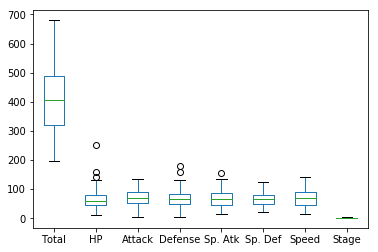

In [42]:
pokemon.plot.box(grid=False)

### Boxplot using sea born

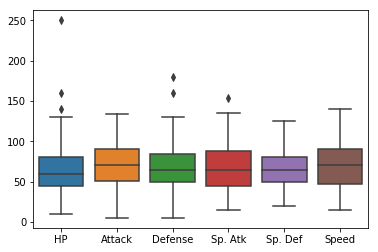

In [39]:
drop_col = ['Total', 'Stage', 'Legendary']

pokemon_bplt = pokemon.drop(drop_col, axis=1)
sns.boxplot(data=pokemon_bplt)

# <font color='blue'>Sachin</font>

In [44]:
sachin = pd.read_csv('../tendulkar_ODI.csv')

In [48]:
sachin.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,NotOut,DNB
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89,0,0
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90,0,0
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90,0,0
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90,0,0
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90,0,0


### Data cleaning

In [55]:
# Creating new column for Not out and DNB data which is embedded in the Runs column
sachin['NotOut'] = sachin['Runs'].str.contains('*', regex=False).apply(lambda x: 1 if x else 0)
sachin['DNB'] = sachin['Runs'].str.contains('TDNB', regex=False).apply(lambda x: 1 if x else 0)
sachin['DNB'] = sachin['Runs'].str.contains('DNB', regex=False).apply(lambda x: 1 if x else 0)

# cleaning Runs column by replacing string like *, TDNB, DNB, and '-'
sachin['Runs'] = sachin['Runs'].str.replace('*', '')
sachin['Runs'] = sachin['Runs'].str.replace('TDNB', '0')
sachin['Runs'] = sachin['Runs'].str.replace('DNB', '0')
sachin['4s'] = sachin['4s'].str.replace('-', '0')
sachin['6s'] = sachin['6s'].str.replace('-', '0')

In [56]:
# changing the datatype of 4s column from Object to integer
sachin['4s'] = sachin['4s'].astype('int64')
sachin['6s'] = sachin['6s'].astype('int64')

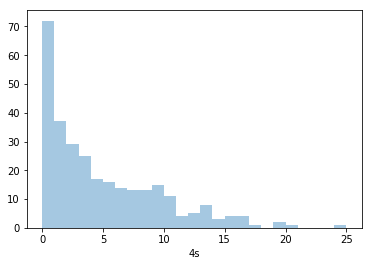

In [65]:
sns.distplot(sachin['4s'], bins=25, kde=False)

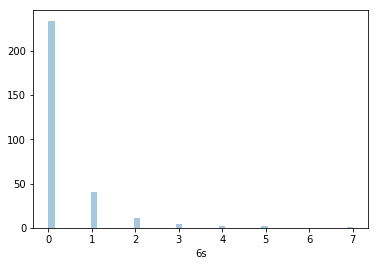

In [61]:
sns.distplot(sachin['6s'], bins=50, kde=False)

# Census Data

In [67]:
census = pd.read_csv('census.csv')

In [98]:
df = census.loc[((census.area_name == 'INDIA') & 
                 (census.TRU == 'Total')
                ), ['Age_group', 'Literate_Persons', 'Total_Persons']]


df['%age'] = 100*(df['Literate_Persons']/df['Total_Persons'])

,Age_group,Literate_Persons,Total_Persons,%age
0,All ages,763638812,1210854977,63.066084
1,0-6,0,164515253,0.000000
2,7,18078426,24826640,72.818658
3,8,22836959,26968373,84.680522
4,9,20932734,23424638,89.362038
5,10,27097602,30552107,88.693071
6,11,22752473,24740946,91.962826
7,12,25485778,27877307,91.421234
8,13,22470207,24280683,92.543554
9,14,23157384,25258169,91.682750


In [106]:
census.head(20)

,Table_name,state_code,Distt._code,area_name,TRU,Age_group,Total_Persons,Total_Males,Total_Females,Illiterate_Persons,Illiterate_Males,Illiterate_Females,Literate_Persons,Literate_Males,Literate_Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088
5,C2308,0,0,INDIA,Total,10,30552107,16089436,14462671,3454505,1661124,1793381,27097602,14428312,12669290
6,C2308,0,0,INDIA,Total,11,24740946,12962604,11778342,1988473,929328,1059145,22752473,12033276,10719197
7,C2308,0,0,INDIA,Total,12,27877307,14637892,13239415,2391529,1087320,1304209,25485778,13550572,11935206
8,C2308,0,0,INDIA,Total,13,24280683,12563775,11716908,1810476,790923,1019553,22470207,11772852,10697355
9,C2308,0,0,INDIA,Total,14,25258169,13165128,12093041,2100785,920460,1180325,23157384,12244668,10912716


In [101]:
census.area_name.unique()

array(['INDIA', 'State - JAMMU & KASHMIR', 'State - HIMACHAL PRADESH',
       'State - PUNJAB', 'State - CHANDIGARH', 'State - UTTARAKHAND',
       'State - HARYANA', 'State - NCT OF DELHI', 'State - RAJASTHAN',
       'State - UTTAR PRADESH', 'State - BIHAR', 'State - SIKKIM',
       'State - ARUNACHAL PRADESH', 'State - NAGALAND', 'State - MANIPUR',
       'State - MIZORAM', 'State - TRIPURA', 'State - MEGHALAYA',
       'State - ASSAM', 'State - WEST BENGAL', 'State - JHARKHAND',
       'State - ODISHA', 'State - CHHATTISGARH', 'State - MADHYA PRADESH',
       'State - GUJARAT', 'State - DAMAN & DIU',
       'State - DADRA & NAGAR HAVELI', 'State - MAHARASHTRA',
       'State - ANDHRA PRADESH', 'State - KARNATAKA', 'State - GOA',
       'State - LAKSHADWEEP', 'State - KERALA', 'State - TAMIL NADU',
       'State - PUDUCHERRY', 'State - ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [112]:
df = census.loc[((census.Age_group == 'All ages') & 
                 (census['TRU'] == 'Total')
                ), ['area_name', 'TRU', 'Age_group', 'Literate_Persons', 'Total_Persons']]


df['tot_lit'] = 100*(df['Literate_Persons'] / df['Total_Persons'])

df.sort_values(by='tot_lit', ascending=False)

,area_name,TRU,Age_group,Literate_Persons,Total_Persons,tot_lit
2784,State - KERALA,Total,All ages,28135824,33406061,84.223710
2697,State - LAKSHADWEEP,Total,All ages,52553,64473,81.511641
2610,State - GOA,Total,All ages,1165487,1458545,79.907511
2175,State - DAMAN & DIU,Total,All ages,188406,243247,77.454604
3045,State - ANDAMAN & NICOBAR ISLANDS,Total,All ages,294281,380581,77.324144
1305,State - MIZORAM,Total,All ages,848175,1097206,77.303168
2958,State - PUDUCHERRY,Total,All ages,957309,1247953,76.710341
1392,State - TRIPURA,Total,All ages,2804783,3673917,76.343124
348,State - CHANDIGARH,Total,All ages,805438,1055450,76.312284
609,State - NCT OF DELHI,Total,All ages,12737767,16787941,75.874504
